In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 100)

/Users/ericprabowocundomanik/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('data/coaster_db.csv')
df.shape

(1087, 56)

In [3]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [4]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [5]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [6]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [11]:
df_clean = df[['coaster_name', 
    # 'Length', 'Speed', 
    'Location', 'Status', 
    # 'Opening date',
    #    'Type',
    'Manufacturer',
    #   'Height restriction', 'Model', 'Height',
    #    'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #    'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #    'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #    'Track layout', 'Fastrack available', 'Soft opening date.1',
    #    'Closing date', 
    # 'Opened',
    #   'Replaced by', 'Website',
    #    'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #    'Single rider line available', 'Restraint Style',
    #    'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
    #    'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #    'height_value', 'height_unit', 
       'height_ft',
       'Inversions_clean', 'Gforce_clean'
]]
df_clean

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


In [16]:
print(df_clean[df_clean['Gforce_clean'].isna()].shape)
print(df_clean[~df_clean['Gforce_clean'].isna()].shape)

(725, 13)
(362, 13)


In [12]:
df_clean.isna().sum()

coaster_name            0
Location                0
Status                213
Manufacturer           59
year_introduced         0
latitude              275
longitude             275
Type_Main               0
opening_date_clean    250
speed_mph             150
height_ft             916
Inversions_clean        0
Gforce_clean          725
dtype: int64

In [17]:
df_clean[df_clean.duplicated()]

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean


In [78]:
df_clean[df_clean.duplicated(subset=['coaster_name'])]

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean


In [21]:
df_clean.groupby(['coaster_name']).count().sort_values(['Status'])

,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
coaster_name,,,,,,,,,,,,
Zydeco Scream,1,0,1,1,0,0,1,0,1,0,1,1
Demon (roller coaster),1,0,1,1,0,0,1,0,1,0,1,0
Klondike Gold Mine (roller coaster),2,0,2,2,0,0,2,0,0,0,2,0
Seven Dwarfs Mine Train,2,0,2,2,0,0,2,0,2,0,2,0
Timberline Twister,1,0,0,1,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Arkham Asylum – Shock Therapy,2,2,2,2,2,2,2,2,2,2,2,2
Little Dipper (Conneaut Lake Park),2,2,2,2,2,2,2,2,0,0,2,0
Raptor Attack,2,2,2,2,2,2,2,2,2,0,2,0


In [25]:
df_clean = df_clean.loc[~df_clean.duplicated(subset=['coaster_name', 'Location', 'opening_date_clean'])].reset_index(drop=True).copy()
df_clean

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


In [26]:
df_clean['year_introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1955     1
1956     1
1959     1
1961     1
1884     1
Name: year_introduced, Length: 101, dtype: int64

Text(0, 0.5, 'count')

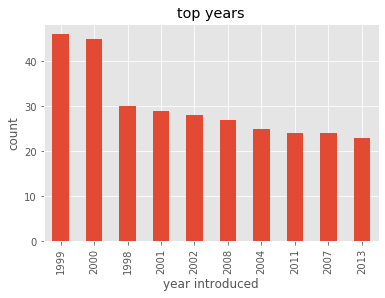

In [35]:
ax = df_clean['year_introduced'].value_counts().head(10).plot(kind='bar', title='top years')
ax.set_xlabel('year introduced')
ax.set_ylabel('count')

Text(0.5, 0, 'speed in mph')

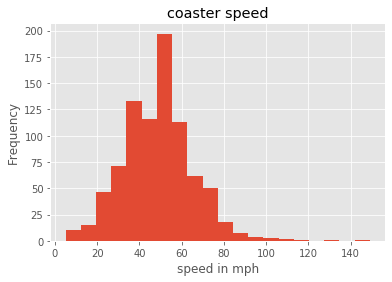

In [44]:
ax = df_clean['speed_mph'].plot(kind='hist', bins=20, title='coaster speed')
ax.set_xlabel('speed in mph')

Text(0.5, 0, 'speed in mph')

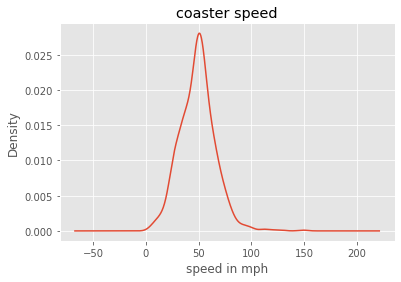

In [46]:
ax = df_clean['speed_mph'].plot(kind='kde', title='coaster speed')
ax.set_xlabel('speed in mph')

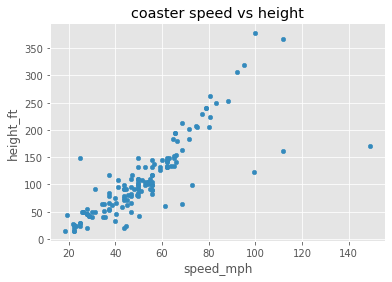

In [48]:
df_clean.plot(
    kind='scatter',
    x='speed_mph', 
    y='height_ft',
    title='coaster speed vs height')
plt.show()

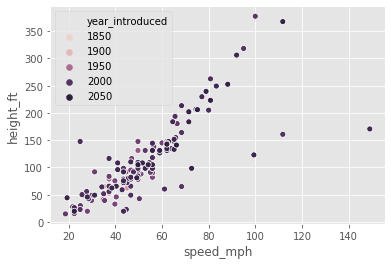

In [52]:
sns.scatterplot(x='speed_mph', y='height_ft', hue='year_introduced', data=df_clean)

In [56]:
df_clean.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

/Users/ericprabowocundomanik/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/ericprabowocundomanik/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


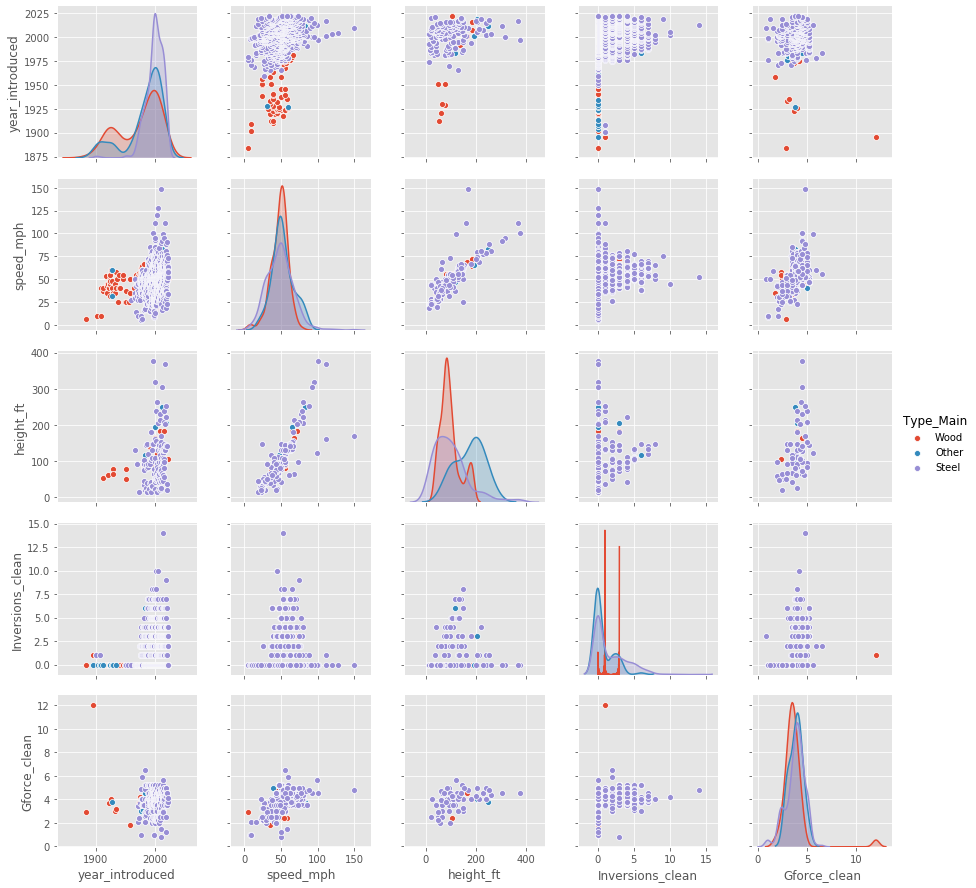

In [62]:
sns.pairplot(data=df_clean, hue='Type_Main', vars=[
    'year_introduced', 'speed_mph', 'height_ft',
    'Inversions_clean', 'Gforce_clean'
])
plt.show()

In [64]:
df_corr = df_clean[['year_introduced', 'speed_mph', 'height_ft', \
          'Inversions_clean', 'Gforce_clean']] \
            .dropna() \
            .corr()
df_corr

,year_introduced,speed_mph,height_ft,Inversions_clean,Gforce_clean
year_introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions_clean,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce_clean,0.160247,0.607383,0.466482,0.275991,1.000000


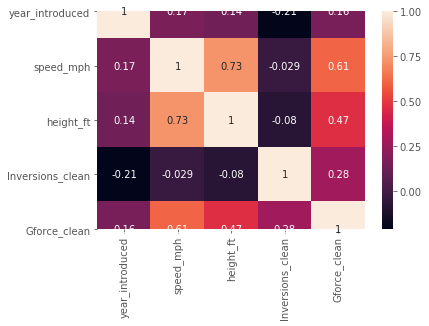

In [71]:
sns.heatmap(data=df_corr, annot=True)

### answer questions:
##### 1. What are locations with the fastest roller coasters (minimum of 10)?

In [72]:
df_clean.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

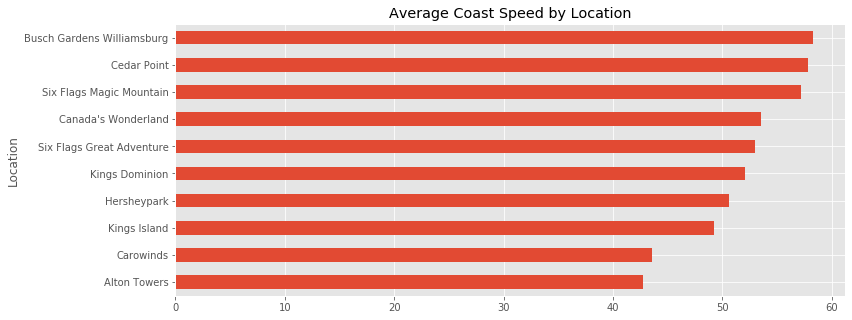

In [77]:
df_clean.query('Location != "Other"') \
    .groupby('Location')['speed_mph'] \
    .agg(['mean', 'count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Coast Speed by Location')